# Neural Network Classification With TensorFlow

In this tutorial, we will cover how to use NNs to solve classification problems. Classification problems require us to put an observation into a category.

Examples:

* Is an email spam or not spam?
* Is the photo presented sushi, steak, or pizza?
* Will a lender default on a loan?
* Is the species of the flower iris, setosa, or virginica?

From the examples above, you can see that classification problems can be binary (only 2 possible outcomes/groups) or multiclass/multinomial (more than 2 possible outcomes/groups). Multiclass classification means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

There is also multilabel classification. Multilabel classification assigns to each sample a set of target labels. This can be thought of as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.

What we will cover (broadly):

* Architecture of a NN classification model
* Input and output shapes of a classification model
* Creating custom data to view and fit
* Steps in the modelling process
* Different classification and evaluation methods
* Saving and loading models

### Classification Inputs & Outputs Part 1

Perhaps we are building an app that will take photos and classify an image as sushi, steak, or pizza. Our input will be images of food and the output will tell us the food that it is. 

When it comes to images, the inputs cannot be photos. We need to numerically encode the images. We could have a 224 x 224 pixel image and a 3 color channels (RGB). The numerical inputs will typically have the same width and height when dealing with images. The images for the input get turned into a tensor, into numerical encoding. In this case, it will be numbers between 0 and 1 for their values of RGB. 

The output will be probabilities for each class, so 3 in this case, with the highest probability assigning the image to the class. 

### Classification Inputs & Outputs Part 2

What will the shape of our inputs and outputs be for an image classification example?

The width and height of our image is 224 x 224 with 3 color channels. The dimensions of our input tensor could be:

* Batch size
* Width
* Height
* Color Channels

The shape of the tensor can be: 

* `Shape` = `[None, 224, 224, 3]`
* `Shape` = `[32, 224, 224, 3]`

What is batch size? Depending on how big our data set is and the amount of computing power we have present, we may only be able to look at 32 samples at one time. For example, if we are working with 10,000 images, our algorithm will only look at 32 at once. 

The shape of the output will be 3 in our case. We are dealing with multiclass classification and we have 3 classes. 

The input and output shapes will vary depending on the problem we are working on. So, if the image is 300 x 300, the width and height will change. If we have 10 possible categories, then the shape of the output will change to 10. 

### Architecture of NN Classification Models

We will have an input layer, one activation function, and then another activation function in the output layer. Furthermore, we will be changing the loss function, metrics, and the input shape. 

The hyperparameters are for binary classification:

* Input layer shape - same as the number of features - same for multiclass
* Hidden layers - problem specific; minimum = 1 and maximum = unlimited - same for multiclass
* Neurons per hidden layer - problem specific; generally 10 to 100 - same for multiclass
* Output layer shape - 1 for binary (one class or the other) - for multiclass, 1 per class (such as 3 for food, person, or dog photo)
* Hidden activation - Usually ReLU - same for multiclass
* Output activation - Sigmoid - for multiclass, it is softmax
* Loss function - cross entropy for both, but the code is different between binary and multiclass
* Optimizer - SGD or Adam for both 

### Creating & Viewing Classification Data to Model

Now that we have covered the basics, let's start to code. In this section we will be creating and viewing classification data to model.



In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples of data
n_samples = 1000

# Create circles
# This will make a large circle containing a small circle in 2d
# It is a simple toy dataset to visualize clustering and classification algorithms
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
# This is a binary classification problem 
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Now, let's visualize some of the data so that we know what we are working with. Currently, our data is a little hard to understand right now.

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})

# View data frame
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


So, we have 2 features per label. We have 1000 rows, as we specified, and 3 columns. Now, let's visualize it.

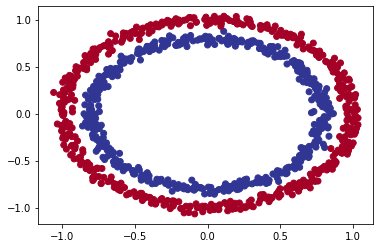

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

So, the package did make a large circle around a smaller circle. We will try to classify whether the dots are 0 or 1/red or blue. 

What is the difference between the data we are using here versus the data we are using for the regression problem we did before? 

The data here is non-linear and the data we used for the regression problem was linear. Furthermore, here the outcome is either 1 or 0, so discrete values, whereas for the regression problem the outcome was numeric. 

### Checking the Input & Output Shapes of Our Classification 



In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in Modelling

* Creating the model
* Compiling the model
* Fitting the model
* Evaluating the model
* Tweak 
* Evaluate
* Repeat

### Building A Mediocre Classification Model

Now, we we are going to create, compile, and fit the model.

In [9]:
# Import
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
# Here is where our classification model will differ from our regression model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'])

# We will use accuracy, but we can also use ROC, AUC, confusions matrices precision, recall, F1 score
# Accuracy = how many examples did our model get correct

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 4s 5ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4830


So, as we can see, the accuracy is low. It seems that our model is just randomly guessing the label. How can we improve our model? We can train it for longer

In [10]:
# Increase the number of epochs
model_1.fit(X, y, epochs = 200, verbose = 0)

# Evaluate the model
# Here we are evaluating on the same data we fit the model on
# In real-world scenarios, we fit the model to training data and evaluate it on testing data
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Our model is still not performing well. Since we are working on a binary classification problem and our model is getting around 50% accuracy, it is performing as if it's guessing.

Let's step things up a notch and add an extra layer. 

In [11]:
# Import
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
# Here is where our classification model will differ from our regression model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'])

# We will use accuracy, but we can also use ROC, AUC, confusions matrices precision, recall, F1 score
# Accuracy = how many examples did our model get correct

# 3. Fit the model
model_2.fit(X, y, epochs = 200, verbose = 0)

In [12]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

Our model is still just as good as guessing. In the next video, we will try and improve our classification model.

### Trying to Improve Our Model

Despite adding an extra layer, model 2 is still performing very poorly.

1. Create a model - add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function, such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

Other common ways of improving the model:

* Change activation functions
* Change the learning rate
* Fit on more data

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers and more hidden units per layer)
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs = 100, verbose = 0)


In [14]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.5040


[0.17511901259422302, 0.5040000081062317]

The accuracy of our model is still bad. Our model is essentially guessing. What else can we visualize? In the next video, we will visualize our predictions. 

### Creating a Function to View Model's Poor Predictions

Let's try to visualize the predictions our model is making.

In [15]:
# Making predictions
model_3.predict(X)[:20]

32/32 [==============================] - 0s 1ms/step


array([[0.48194796],
       [0.5318304 ],
       [0.5341361 ],
       [0.5277429 ],
       [0.4754249 ],
       [0.5303988 ],
       [0.5165642 ],
       [0.48009723],
       [0.49766317],
       [0.5235115 ],
       [0.51743436],
       [0.49747607],
       [0.5205078 ],
       [0.47408435],
       [0.4747443 ],
       [0.4859617 ],
       [0.5304266 ],
       [0.48832428],
       [0.53009504],
       [0.5143752 ]], dtype=float32)

This is not very helpful. So, let's visualize the predictions against the actual data. 

To visualize our model's predictions, let's create a function `plot_decision_boundary()`. 

This function will:

* Take in a trained model, features (X) and (y)
* Create a meshgrid using `numpy` of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the different zones, where each unique class falls

In [16]:
# Import numpy
import numpy as np

In [17]:
# Making the function
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  # Create x values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2-d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
    
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


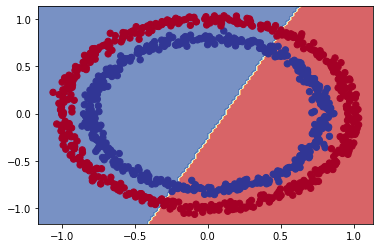

In [18]:
# Let's run the function by checking the predictions our model is making
plot_decision_boundary(model_3,
                       X = X,
                       y = y)

Sp, what does this plot tell us? It is showing us that our model is performing so poorly because it is trying to draw a straight line through the data. Our data is circuluar and it is not separable by a straight line. In a regression problem, our model might work since it is predicting a straight line. So, how do we improve this? 

### Make Our Model Work For a Regression Dataset

All of our previous models are performing poorly, as good as guessing. Our data is circular, but our model is predicting a straight line. 

In [19]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)# y = x + 100

# Inspect
X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [20]:
# Split our regression data into training and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# We cannot fit our model to the regression data as it was previously
# We will have a shape issue. Our model is made for a binary classification problem not regression
# Our loss function is binary cross entropy and this needs to change 

# model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Let's recreate model 3 but change the loss function to an appropriate function for a regression problem.

In [21]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

Seems like our model is learning something from these training metrics. 

Now, let's make predictions with our trained model.

2/2 [==============================] - 0s 3ms/step


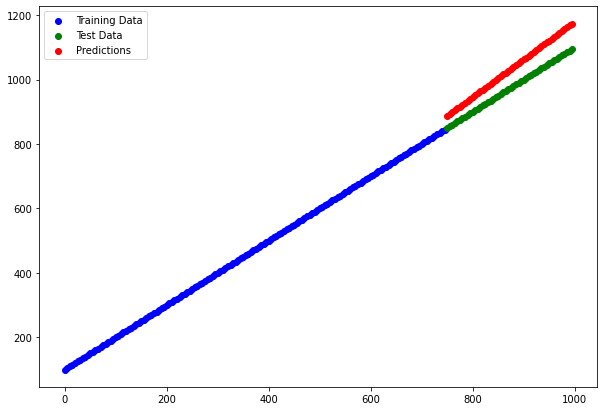

In [22]:
from pandas.compat import platform
# Make predictions
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = 'Training Data')
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = 'Test Data')
plt.scatter(X_reg_test, y_reg_preds, c = 'r', label = 'Predictions')
plt.legend();

So, our predictions are not too far off. This means that our model is learning something, but it is still missing something for our classification problem. Our regression problem is a straight line and our classification data is non-linear, but the decision boundary our model is plotting is linear. We have to introduce non-linearity in our models. 

### Non-linearity Part 1

We have seen that our built NN can model straight lines with better than guessing accuracy. However, when it comes to non-linear data, we are missing something. The thing we are missing is non-linearity. Neural networks can model non-linear data using activation functions in the hidden layers and output layer. For the hidden layers, we can use a selection of activation functions, with ReLU being the most popular. For the output layer, depending on the number of outcomes, we can use either sigmoid or softmax.

Let's look at changing activation functions.



In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))


# 2. Compile our model
model_4.compile(loss = 'binary_crossentropy', # We can use strings to set arguments
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy']
                )

# 3. Fit the model 
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/100
32/32 [=

Looks like our model is performing a little worse than guessing. Let's remind ourselves what our data looks like.

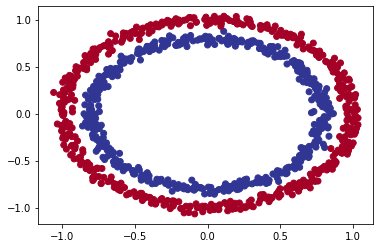

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


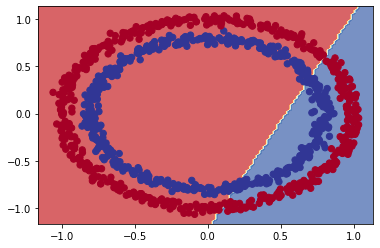

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model = model_4, 
                       X = X,
                       y = y)

Our model's decision boundary is all over the place. The yellow shade is showing that anything there could be blue or red. Our model is still predicting straight lines. Let's use activation functions to fix this.

### Non-linearity Part 2:

Let's add the ReLU activation function, a non-linear activation function, in our neural network.

In [26]:
# Set random seet
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.relu))

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

Even with our non-linear activation function, our model is still performing as good as guessing. Now, let's add more neurons and layers to our NN. 

### Non-linearity Part 3:

In this tutorial, we will add more neurons and layers to our NN, while also changing the activation functions.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(4, activation = tf.keras.activations.relu))
model_6.add(tf.keras.layers.Dense(4, activation = 'relu')) # Can also use qutations marks to set the activation like this

# 2. Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.2090 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6531 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5983 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5333 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4114 - accuracy: 0.1490
Epoch 11/

Looks like our model is now performing worse than guessing. Let's evaluate the model.

In [28]:
# Evaluating the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.3770


[0.6643651723861694, 0.37700000405311584]

Maybe we need to train our model for longer?

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(4, activation = tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(4, activation = 'relu')) # Can also use qutations marks to set the activation like this

# 2. Compile the model
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs = 250, verbose = 0)

In [30]:
# Evaluate
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.4830


[0.332845002412796, 0.4830000102519989]

Our model is still basically guessing. Let's see what happens if we fix it so the last layer has 1 option rather than 4, since this is a binary classification problem.

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(4, activation = tf.keras.activations.relu))
model_8.add(tf.keras.layers.Dense(4, activation = 'relu')) # Can also use qutations marks to set the activation like this
model_8.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_8.fit(X, y, epochs = 250, verbose = 0)

In [32]:
# Evaluate
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Our accuracy is still 50% even after 250 epochs. The model is still essentially just guessing. Let's visualize what is happening. 

313/313 [==============================] - 1s 1ms/step
doing binary classification


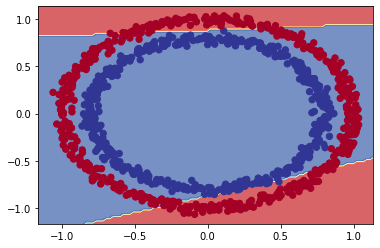

In [33]:
# How do our model predictions look?
plot_decision_boundary(model_8, X, y)

It looks like our model is still operating from straight lines. It seems that we need to change the activation function for the last layer. The last layer, which is the output layer, needs to be changed so that the output is non-linear. In a binary classification problem, we will be using a sigmoid activation function. 

### Non-linearity Part 4: 

Let's add the sigmoid activation function to the output layer and see how our model performs. 

In [34]:
# Set the random seet
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential() 
model_9.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_9.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_9.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid))

# 2. Compile the model
model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_9.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

As you can see, our accuray has gone up to about 99%. Let's try evaluating the model.

In [35]:
# Evaluate the model
model_9.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step
doing binary classification


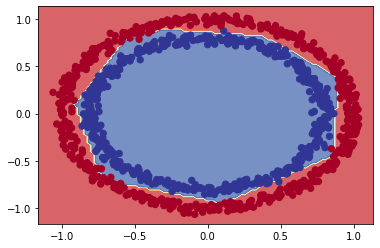

In [36]:
# Let's visualize our metrics
plot_decision_boundary(model_9, X, y)

As you can see, our model is performing really well. It seems that our model has found a really good decision boundary between our red and blue points. 

As a note, we do not having training and testing sets, so our model is not being evaluated in the correct manner. This is not super relevant right now because we are just practicing. 

The combination of linear and non-linear functions is one of the most important aspects of neural networks. The activation functions in the hidden layers and output layers allow the network to learn non-linear patterns. 

### Non-linearity Part 6:

In this tutorial, we will replicate non-linear activations functions from scratch. We have seen the names of the functions, but we have not seen the details of the activation functions. 

In [37]:
# Create a toy tensor similar to our data we pass into our models
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

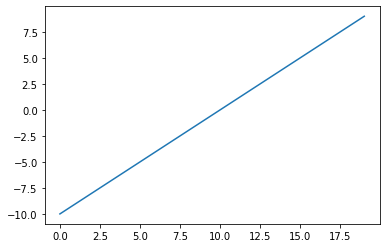

In [38]:
# Visualize our toy tensor
plt.plot(A);

Let's apply the sigmoid activation function to our tensor. The sigmoid activation function is:

$$ sigmoid(x) = 1 / (1 + e^{-x}) $$

In [39]:
# Let's make the sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on the toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

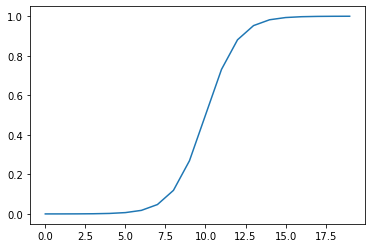

In [40]:
# Plotting the sigmoid of A
plt.plot(sigmoid(A));

This line was originally straight, but it is not in an S shape. The sigmoid function takes any real number and plots it to probability between 0 and 1. The sigmoid function is called a squashing function because the output is always between 0 and 1. 

Now, let's look at the ReLU activation function. ReLU is the rectified linear unit. The ReLU activation function will output the input directly if it is positive, otherwise it will output 0. 

In [41]:
# Let's create the relu function
def relu(x):
  return tf.maximum(0, x)

# Let's pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

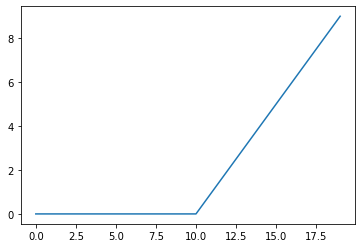

In [42]:
# Let's plot our toy tensor with the ReLU function
plt.plot(relu(A));

The ReLU is used in the hidden layers instead of sigmoid or tanh as using sigmoid or tanh in the hidden layers leads to the infamous problems of the vanishing gradient. The vanishing gradient prevents the earlier layers from learning important information when the network is backpropagating. 

Let's try the linear activation function. In tensorflow, the linear activation will return the tensor unmodified.

In [43]:
# Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

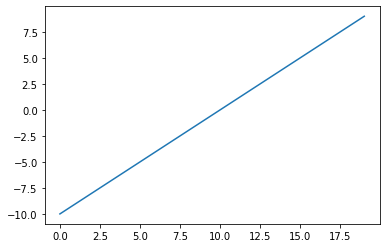

In [44]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [45]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Our linear activation function essentially changes nothing, that is why our results previously were so bad. Using non-linear functions allows the neural network to learn patterns present in non-linear data. 

### Tweaking the Learning Rate

In the last few videos, we tackled the concept of non-linearity. The combination of straight line functions and non-straight line functions is a key concept in neural networks. In this tutorial, we will evaluate our model and improve our classification. Furthermore, we will use a training set and a testing set, which we did not use previously. 

The goal of our NN is to generalize, which means we want to it perform well on data it has never seen before.

Let's create a training and test set.


In [46]:
# Check how many examples we have
len(X)

1000

In [47]:
# Let's create train/test sets by indexing
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [48]:
# Let's create a model to fit on the train data and evaluate on the testing data

# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_10.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_10.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# 2. Compile the model
model_10.compile(loss = 'binary_crossentropy', # The loss function tells the model how wrong the predictions are
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), # The optimizer tells the model how it should improve - the learning rate is how much the model should improve those patterns
                 # The learning rate determines the step size at each iteration while moving toward a minimum of a loss function - the larger the learning rate, the more our model updates the parameters
                 metrics = ['accuracy'])

# 3. Fit the model
history = model_10.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

As you can see, with our new learning rate, we are at an accuracy of 98% after only 25 epochs. Now, let's evaluate the model on the test data.

In [49]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


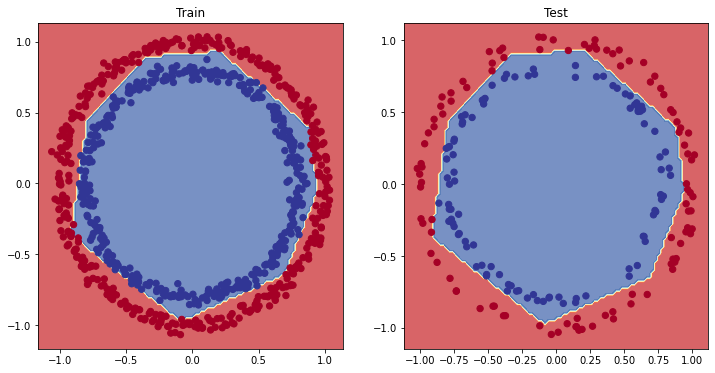

In [50]:
# Plotting the decision boundaries for the training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X = X_test, y = y_test)
plt.show;

### Using the TensorFlow History Object to Plot a Model's Loss Curves

We have been our saving our model into a `history` object. Let's see how we can plot the loss (or training) curves using this object. 

In [51]:
# history.history will just give us the loss and accuracy; it essentially just tracks what is happening when the model is being trained
history.history

{'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735944151878357,
  0.6681485772132874,
  0.6632685661315918,
  0.6545671224594116,
  0.6412574648857117,
  0.6264280080795288,
  0.6038309335708618,
  0.571403443813324,
  0.5404428243637085,
  0.5015037655830383,
  0.46833184361457825,
  0.41130152344703674,
  0.36250579357147217,
  0.3209042251110077,
  0.2847079038619995,
  0.2597199082374573,
  0.2374689280986786,
  0.21351952850818634,
  0.19382020831108093,
  0.17524360120296478,
  0.16189296543598175,
  0.1549890637397766,
  0.14897282421588898],
 'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.96

In [52]:
# Let's make our history object into a data frame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Text(0.5, 1.0, 'Model_8 Loss Curves')

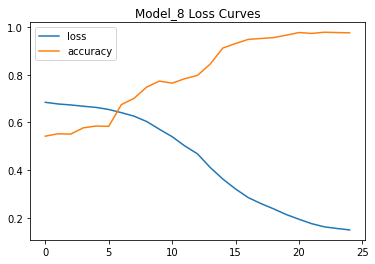

In [53]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 Loss Curves')

This is an ideal version of what we want to see in a classification problem. As you can see, the loss (how wrong our model is) is decreasing, which means our model is improving. Furthermore, our accuracy is going up (the predictions it's making are getting closer to the ground truth labels).

### Using Callbacks to Find a Model's Ideal Learning Rate

We have seen how the learning rate can affect our model's training. Is there a method to find an ideal learning rate? A value which would allow the model's loss during training to decrease as fast as possible. 

How much we decrease the learning rate during training? To find the ideal learning rate (the learning rate where the loss decreases the most during training), we are going to use the following steps:

1. A learning rate callback - you can think of a callback as an extra piece of functionality you can add to your model while its training. 
2. Another model (we could use the same as above, but we are practicing building models here).
3. A modified loss curves plot. 

In [54]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_11.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_11.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# 2. Compile the model
model_11.compile(loss = 'binary_crossentropy',
                 optimizer = 'Adam',
                 metrics = ['accuracy'])

# A callback works just during model training
# In order for the callback to run, it must exist before fitting the model
# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 
# For every epoch, it will traverse a set of learning rate values starting from 
# 1e-4 and increasing by 10**(epoch/20) every epoch

# 3. Fit the model (passing lr_scheduler callback)
history_11 = model_11.fit(X_train, 
                          y_train,
                          epochs = 100,
                          callbacks = [lr_scheduler]) # Callbacks are in list form since there can be many

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

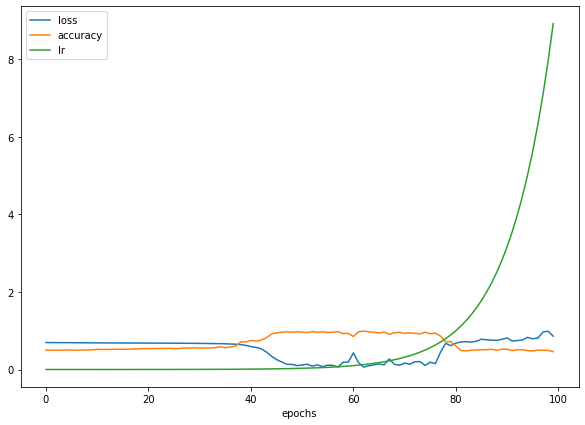

In [55]:
# Checkout the history
pd.DataFrame(history_11.history).plot(figsize = (10, 7), xlabel = 'epochs');

The y-axis above is the learning rate. As we increase in epochs, the learning rate increases. Our accuracy seems to up and then decreases as we go into more epochs. Our loss decreases then increases again as we go further. 

We want a learning rate where the loss decreases the fastest. This ideal learning rate is achieved at around 40-50 epochs. Let's plot the learning rate values during training versus the loss.

In [56]:
# Plot the learning rate versus the loss
# We are replicating what we are passing to the learning rate scheduler so we can plot it
# These are the learning rates our model tried out
lrs = 1e-4 * (10 ** (tf.range(100)/20))
len(lrs)

100

Text(0.5, 1.0, 'Learning Rate Versus Loss')

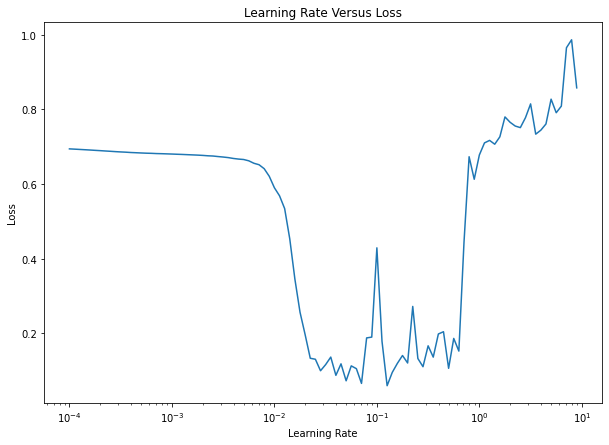

In [57]:
# Plotting
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_11.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Versus Loss')

We want a learning rate value where our loss decreases the most. To figure out the ideal value of the learning rate, the rule of thumb is to take the learning rate value where the loss is still decreasing but not flattened out. In our case, the ideal learning rate would be about 10^-2, which is the default learning rate we use. 

The pre-built optimizers have generally very good default parameters. When they don't, you can use other learning rates. You typically do not use 1, but rather the options below 1. Additionally, you can also plot the learning rate versus loss, as we did above. 

In [58]:
# Example of other typical learning rate values are:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

### Training & Evaluating a Model With an Ideal Learning Rate

Let's train a model with a learning rate of of 0.02. We got this value by using the plot we made in the last tutorial.

In [59]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential()
model_12.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_12.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_12.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# 2. Compile the model with the ideal learning rate (0.02)
model_12.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ['accuracy'])

# 3. Fit the model for 20 epochs (5 less than before)
history_12 = model_12.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

Our model with the ideal learning rate achieved an accuracy of 99% after only 20 epochs. Compared to model 10, which had 25 epochs and a learning rate of 0.01, our current model, model 12, achieved a greater accuracy in less time.

In [60]:
# Evaluate model 12 on the test dataset
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

In [61]:
# Evaluate model 10 on the test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

When evaluating the 2 models on the testing data, model 12 gets a lower loss and an accuracy of 99%. However, model 10 gets a higher accuracy (100%), but has a higher loss. This is something that should be investigated more, depending on what your needs are. It can take some trial and error to see what is needed for your use-case.

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


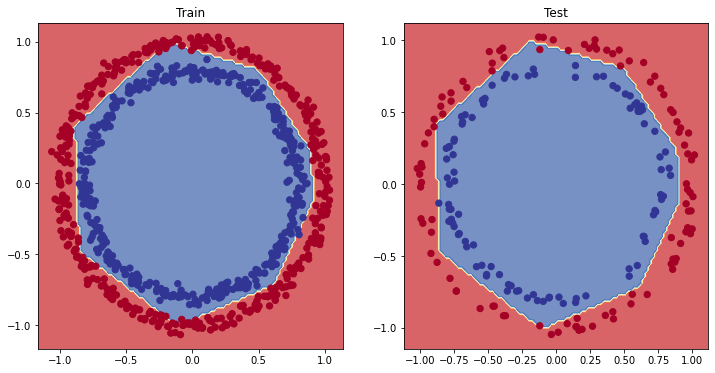

In [62]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_12, X = X_train, y = y_train)
plt.subplot(1, 2, 2) # Row, column, section
plt.title('Test')
plot_decision_boundary(model_12, X = X_test, y = y_test)
plt.show()

### Introducing More Classification Evaluation Methods

Some common evaluation metrics are:

* Accuracy - Default metric for classification problems. Not the best for imbalanced classes.
* Precision - Higher precision leads to less false positives.
* Recall - Higher recall leads to less false negatives.
* Precision-Recall Tradeoff - You cannot have both precision and recall high. If you increase precision, it will reduce recall, and vice versa. 
* F1-Score - Combination of precision and recall, usually a good overall metric for a classification model. 
* Confusion Matrix - When comparing predictions to truth labels to see where the model gets confused. Can be hard to use with a large number of classes. 
* Classification Report (from `sci-kit` learn). 

### Finding the Accuracy of Our Classification Model

Our model has already used accuracy as it's metrics. However, let's make it nicer.

In [63]:
# Check the accuracy of our model
loss, accuracy = model_12.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.057401832193136215
Model accuracy on the test set: 99.00%


### Creating Our First Confusion Matrix

The anatomy of a confusion matrix is:




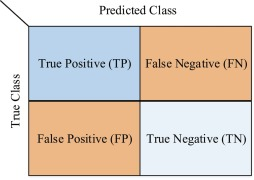


The diagonal contains the correct predictions: true positives and the true negatives. 

* True positive = model predicts 1 when the truth is 1
* True negative = model predicts 0 when the truth is 0
* False positive = model predicts 1 when the truth is 0
* False negative = model predicts 0 when the truth is 1

In [64]:
# Now let's make a confusion matrix using sci-kit learn
from sklearn.metrics import confusion_matrix

# Make some predictions
# As a note, you may get a value error when making the confusion matrix if you do not 
# Fix the values of the y predictions
# The test values are in binary form, but the predictions will be in numeric form 
# The prediction array will need to be converted to 0s and 1s 
y_preds = model_12.predict(X_test)

7/7 [==============================] - 0s 2ms/step


The prediction array is in prediction probability form, the standard output from the sigmoid or softmax activation functions. Thus, we need to convert these values to binary outcomes. The cut-off we typically use 0.5, but this may change depending on the use-case.

In [65]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
# Create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

### Making Our Confusion Matrix Prettier



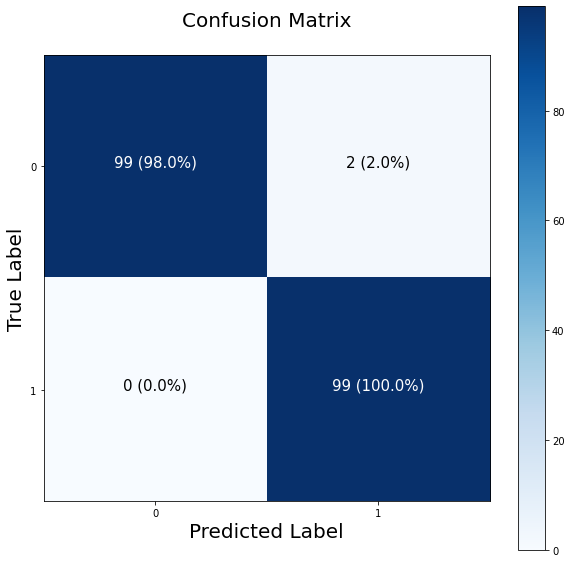

In [67]:
# Note: The confusion matrix code we are going to write is a remix of the scikit-learn 
# plot_confusion_matrix function
import itertools

figsize = (10, 10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))

# Create a normalized feature to give us percentages
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# Set the number of classes
n_classes = cm.shape[0]

# Let's make the confusion matrix prettier
fig, ax = plt.subplots(figsize = figsize)

# Create a matrix plot and use a color map of blues
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False # Setting up a boolean in case it is multiclass

if classes:
  labels = classes 
else: 
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text in each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i, j] > threshold else 'black',
           size = 15)

# Multi-Class Classification

### Multi-Class Classification Part 1: Getting the Data

Now that we have completed an example using a binary classification problem, we will now work through a multi-class classification problem. 

When you have more than 2 classes as an option, it is known as a multi-class classification problem. 

* This means if you have 3 different classes, it is multi-class classification.
* It also means if you have 100 different classes, it is multi-class classification. 

The good news is that we can apply many of the same concepts we learned during binary classification, except with a few tweaks. 

We will pretend we are a fashion company and we want to build a NN to classify different images of clothing. We can use the fashion MNIST dataset, which is built into `TensorFlow`. 

This dataset has:

* 60,000 training examples
* 10,000 test examples
* Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [68]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
# To import it, we can use tuples
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [69]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

There are 10 classes, ranging from 0 to 9. In this case, the above example is an ankle boot. 

In [70]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

So, each example is 28x28 and the train label has no shape since it is just a scalar.

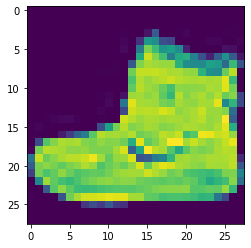

In [71]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

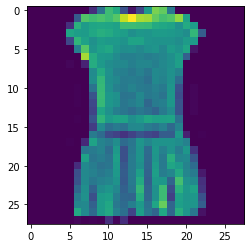

In [72]:
# Plot a single sample again
import matplotlib.pyplot as plt
plt.imshow(train_data[3]);

In [73]:
# Check out the above samples label - it will be a dress
train_labels[3]

3

### Multi-Class Classification Part 2: Exploring the Data

Let's get familiar with the data that we will be working with for the multi-class classification problem. 

Our labels are numeric, which is fine for NN, but we want them in human readable form so we can index on the list and find the item associated with the number.

In [74]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
               'Bag', 'Ankle Boot']

# How many classes are we dealing with? 
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

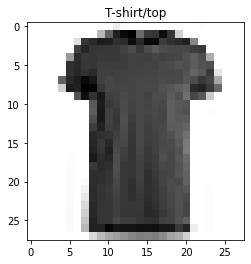

In [75]:
# Plot an example imahe and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary) 
# Colormap will be binary because it is grayscale
plt.title(class_names[train_labels[index_of_choice]])

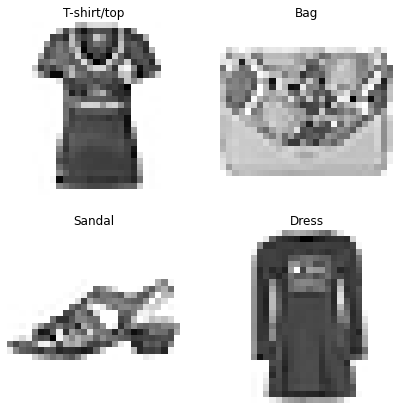

In [76]:
# Let's setup some code to plot random examples of fashion MNIST
import random
plt.figure(figsize = (7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

With this type of data, will we need a neural network that works only with straight lines? Or will we need a neural network that is going to have some non-linearity in it? 

### Multi-Class Classification Part 3: Building a Multi-Class Classification Model

For our multi-class classification model, we need to change:

* Input shape - this is 28 x 28, which is the shape of one image.
* Output layer shape - this needs 1 per class.
* Output activation - this will be the softmax activation function rather than sigmoid.
* Loss function - this will be the categorical cross entropy rather than binary cross entropy. In this example, this will be 10, since we have 10 classes of clothing.

Otherwise, the architecture will be similar to our binary classification model. 

In [77]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential()
# This is telling the NN we are passing images that are 28 x 28
# Our data needs to be flattened from (28 x 28) to (None, 784)
model_13.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_13.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_13.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_13.add(tf.keras.layers.Dense(10, activation = 'softmax')) # Can also do tf.keras.activations.softmax


# 2. Compile the model 
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# 3. Fit the model
non_norm_history = model_13.fit(train_data, 
                                train_labels,
                                epochs = 10,
                                validation_data = (test_data, test_labels))
# The validation_data = argument allows us to evaluate the training predictions on 
# the validation/test data

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

So, what does the flatten layer do in the NN? According to the documentation, this layer flattens the input (and it does not affect batch size). Our 28 x 28 images will be flattened to 28*28 = 784. Essentially, this layer converts the 2-dimensional object into a 1-dimensional vector because this is the ideal format for NNs.

If you ever run into a shape error, check if using a flatten layer for this first layer will work. 

Furthermore, we need to be careful with our loss functions. There are 2 types of loss functions.

* One is if your data is one-hot encoded. `tf.keras.losses.CategoricalCrossentropy()` expects labels to be provided in a `one_hot` representation. 
* The second is for integers. `tf.keras.losses.SparseCategoricalCrossentropy()` is to be used when you want ro provide labels as integers. 

In [78]:
# If we wanted to one-hot encode our labels and use the categorical cross entropy, we could
tf.one_hot(train_labels, depth = 10) # depth = is the number of classes

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In addition to this, if we are one-hot encoding, we would also need to one hot encode the labels in the test data. It would look like:

* `validation_data = (test_data, tf.one_hot(test_labels, depth = 10))`

### Multi-Class Classification Part 4: Improving Performance With Normalization

We coded the `validation_data` argument, but we did not really explain it. The validation loss and accuracy in the output is telling us how our model is performing on data it has never seen before. Whenever you pass the argument, you will get extra output when training the model. 

Right now, our model the accuracy of our model is about 35%, which is better than guessing. Can we improve this through normalization?

In [79]:
# Check the model summary
model_13.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In previous videos, we talked about scaling and normalization. Remember, NNs tend to prefer normalization. This means they like to have numbers in the tensors they to find patterns in between 0 and 1. Right now our data is between:

In [80]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

How do we get our data between 0 and 1? 

In [81]:
# We can our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [82]:
# Let's make our model with the normalized data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_13.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_13.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_13.add(tf.keras.layers.Dense(10, activation = 'softmax')) # Can also do tf.keras.activations.softmax


# 2. Compile the model 
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# 3. Fit the model
norm_history = model_13.fit(train_data_norm, 
                                train_labels,
                                epochs = 5,
                                validation_data = (test_data_norm, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881


As we can see from the model above, our model has an accuracy of 79% on the test data ater only 5 epochs. Our previous model with non-normalized data used 10 epochs and the accuracy was 33% on the test data.

### Multi-Class Classification Part 5: Comparing Normalized & Non-Normalized Data 

Let's compare the loss curves of each model.

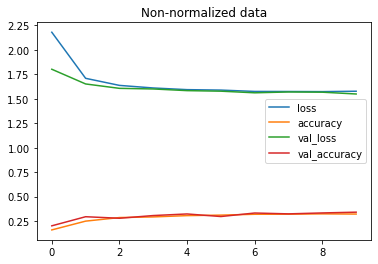

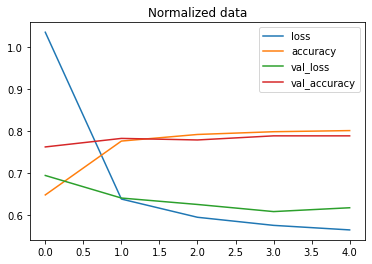

In [83]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'Non-normalized data')

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = 'Normalized data')

From these 2 plots, we can see how much quicker the model with normalized data improved when compared to the model with normalized data. 

When making comparisons of different models, the same model with even slightly different data can produce dramatically different results. So when you are comparing models, it is important to make sure you are comparing them on the same criteria (e.g., same architecture but different data or same data but different architecture. 

### Multi-Class Classification Part 6: Finding the Ideal Learning Rate

The ideal learning rate is the learning rate where the loss decreases the most.

In [84]:
import tensorflow as tf

# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential()
model_14.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_14.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_14.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_14.add(tf.keras.layers.Dense(10, activation = 'softmax')) # Can also do tf.keras.activations.softmax


# 2. Compile the model 
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))
# We are starting at 1e-3 and increasing the learning rate at every epoch by 10 ** (epoch / 20)

# 3. Fit the model
find_lr_history = model_14.fit(train_data_norm, 
                                train_labels,
                                epochs = 10,
                                validation_data = (test_data_norm, test_labels),
                                callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

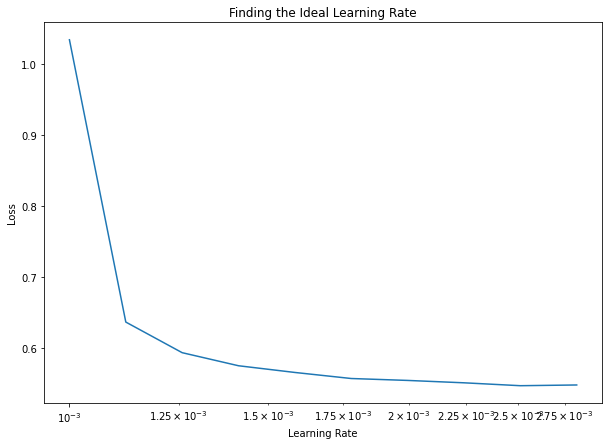

In [85]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(10) / 20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')

We can see that, when it started off, the loss decreased fairly sharply and continued to do so. In the tutorial on Udemy, 40 epochs were run and, after awhile, the loss would increase as the learning rate increased. 

The ideal learning rate is where the loss decreasing sharply. Find the lowest point in the curve and go back slightly. Our ideal learning right is 10e-3, which is 0.001, the default parameter for the Adam optimizer. 

Let's refit a model with the ideal learning rate. 

In [86]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_15 = tf.keras.Sequential()
model_15.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_15.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_15.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_15.add(tf.keras.layers.Dense(10, activation = 'softmax')) # Can also do tf.keras.activations.softmax


# 2. Compile the model 
model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ['accuracy'])

# 3. Fit the model
history_15 = model_14.fit(train_data_norm, 
                                train_labels,
                                epochs = 10,
                                validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5396 - accuracy: 0.8086 - val_loss: 0.5599 - val_accuracy: 0.8081
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5355 - accuracy: 0.8092 - val_loss: 0.6395 - val_accuracy: 0.7784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5296 - accuracy: 0.8112 - val_loss: 0.5959 - val_accuracy: 0.7801
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5280 - accuracy: 0.8126 - val_loss: 0.5647 - val_accuracy: 0.7958
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5242 - accuracy: 0.8118 - val_loss: 0.5695 - val_accuracy: 0.8042
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5208 - accuracy: 0.8144 - val_loss: 0.5719 - val_accuracy: 0.7987
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5175 - accuracy: 0.8149 - val_loss: 0.5757 - val_accuracy:

### Multi-Class Classification Part 7: Evaluating Our Model

Now that we have a model trained with close to an ideal learning rate and that is performing pretty well, let's evaluate our model. 

To evaluate or test our multi-class classification model, we could: 

* Evaluate its performance using other classification metrics, such as confusion matrix.
* Assess some of its predictions through visualizations
* Improve its results by training it for longer or changing the architecture 
* Save & export it for use in an application 

We will do the first 2, making a confusion matrix and assessing predictions.

In [87]:
# Create a confusion matrix

# Note: The confusion matrix code we are going to write is a remix of the scikit-learn 
# plot_confusion_matrix function
import itertools
from sklearn.metrics import confusion_matrix

# Let's make a function
def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):

  # Create the confusion matrix 
  cm = confusion_matrix(y_true, y_pred)

  # Create a normalized feature to give us percentages
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

  # Set the number of classes
  n_classes = cm.shape[0]

  # Let's make the confusion matrix prettier
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot and use a color map of blues
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes 
  else: 
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text in each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = text_size)

In [88]:
# Remind ourselves of class names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [89]:
# Let's make predictions with our model; making prediction probabilities
y_probs = model_14.predict(test_data_norm) 

# View the first 5 prediction probabilities
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[3.6318497e-09, 2.9815805e-09, 4.0706462e-05, 6.6824509e-06,
        5.7241632e-05, 1.9796677e-01, 4.0163053e-07, 3.0917259e-02,
        2.8633790e-03, 7.6814753e-01],
       [6.8108475e-06, 2.3224570e-18, 9.0286195e-01, 9.2501409e-07,
        4.0466763e-02, 7.3381649e-18, 5.6550261e-02, 6.5604086e-37,
        1.1327548e-04, 7.0746342e-21],
       [9.7082084e-05, 9.9651682e-01, 3.7497281e-07, 3.3407379e-03,
        2.9725012e-05, 2.4812312e-20, 1.5173554e-05, 1.4708202e-14,
        1.5337999e-07, 6.3644871e-12],
       [6.9312227e-05, 9.9363434e-01, 2.6334096e-06, 5.9774704e-03,
        2.7009135e-04, 4.8050277e-17, 4.4899120e-05, 1.5792758e-11,
        1.2690064e-06, 7.3886262e-09],
       [8.5871853e-02, 2.2927627e-06, 1.5143684e-01, 1.1774629e-02,
        9.2073187e-02, 1.3644839e-16, 6.5862215e-01, 5.0324458e-24,
        2.1905277e-04, 1.3127929e-15]], dtype=float32)

As a note, remember to make predictions on the same kind of data your model was trained on. So, if your model is trained on normalized data, it should make predictions on normalized data. 

In [90]:
# Convert all of the prediction probabilities to integers
# This will make our predictions in the same format as our test labels 
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### Multi-Class Classification Part 8: Creating a Confusion Matrix



In [91]:
# Make a for loop to count how many prediction labels match true labels
count = 0
for i, j in zip(y_preds, test_labels):
  if i == j:
    count += 1
  else:
    continue

# Get the accuracy
accuracy = count / len(y_preds)
print(accuracy)

0.8018


Now that we have gotten the same accuracy as our model, let's make a confusion matrix using `sci-kit learn`. 

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[823,  16,  14,  61,   7,   1,  70,   0,   8,   0],
       [  4, 955,   3,  22,   7,   2,   7,   0,   0,   0],
       [ 36,   3, 572,   8, 248,   1, 123,   0,   9,   0],
       [ 71,  39,  10, 786,  50,   0,  39,   2,   3,   0],
       [  2,   4,  60,  25, 835,   0,  71,   0,   3,   0],
       [  0,   1,   0,   0,   0, 911,   0,  51,   5,  32],
       [207,  11, 129,  41, 207,   1, 395,   1,   8,   0],
       [  0,   0,   0,   0,   0,  29,   0, 921,   0,  50],
       [ 14,   2,  50,  21,  12,   7,   6,   6, 882,   0],
       [  0,   0,   1,   0,   0,  16,   0,  45,   0, 938]])

This is a bit much and contains a lot of values. One thing to look is the diagonal. On the diagonal, we want to have the highest numbers because these are our correct predictions.

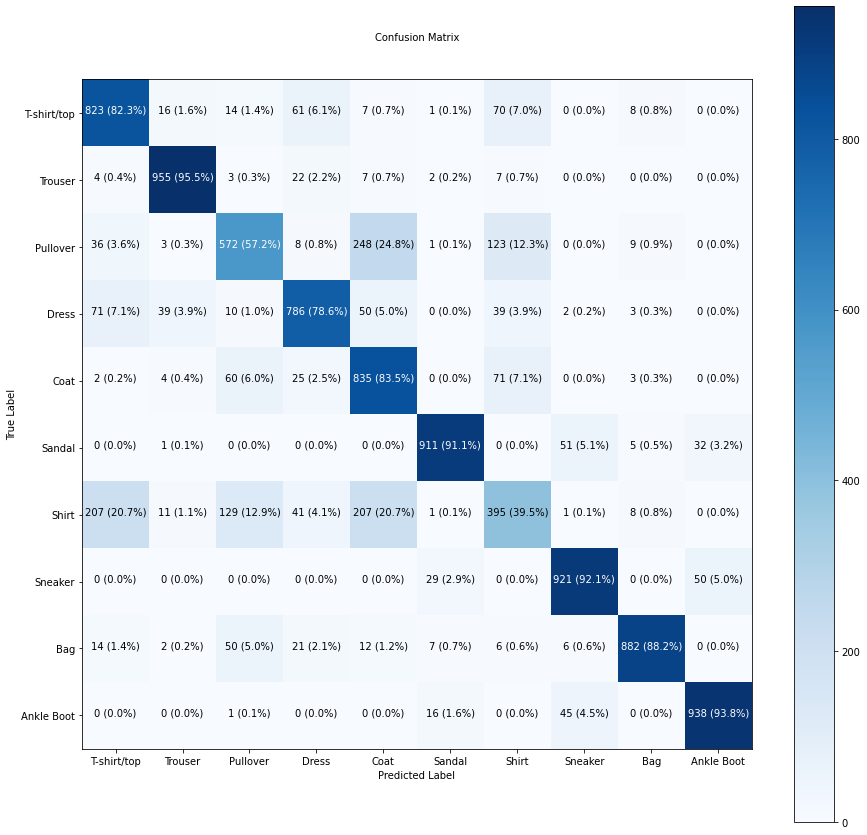

In [93]:
# Make a prettier confusion matrix using our function
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 10)

When looking at a confusion matrix like the one above, we can start to see patterns where our model is making mistakes, such as thinking pullovers are coats. This will then give us guidance on how we can possibly improve our model. 

### Multi-Class Classification Part 9: Visualizing Random Model Predictions

When working with images and other forms of visual data, it is a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models. 

How about we create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the true label and the predicted label

In [97]:
import random

def plot_random_image(model, images, true_labels, classes):
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]

  # Passing only one image at a time
  pred_probs = model.predict(target_image.reshape(1, 28, 28))

  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the titles depending on on if the prediction is right/wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 
                                                   100* tf.reduce_max(pred_probs),
                                                   true_label), 
                                                   color = color)

1/1 [==============================] - 0s 16ms/step


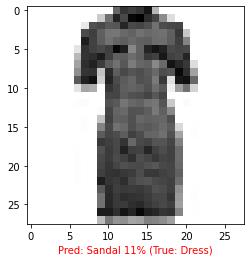

In [114]:
# Running our function
plot_random_image(model = model_15, 
                  images = test_data_norm, # Always make predictions on the same kind of data your model was 
                  # trained on - preprocessed the same way
                  true_labels = test_labels,
                  classes = class_names)

### What Patterns Is Our Model Learning?



In [115]:
# Find the layers of our most recent model
model_15.layers

In [116]:
# Extract a particular layer
model_15.layers[1]

In [117]:
# Get the patterns of a layer in our network
# These are the patterns in the first layer that contribute to the decisions our model is making
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.0287192 , -0.01029544, -0.02567479, -0.00619847],
        [-0.08138508,  0.03222882,  0.04190503,  0.06499861],
        [-0.04776123, -0.04830738, -0.03309086,  0.0388018 ],
        ...,
        [ 0.01556861,  0.01661945,  0.06991768, -0.02348963],
        [ 0.01095042,  0.02673633, -0.00792591, -0.07461146],
        [-0.00482979,  0.027058  ,  0.02233649, -0.05812328]],
       dtype=float32), (784, 4))

In [118]:
# Remind ourselves of our model
model_15.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


So, how does our neural network learn these patterns? 

* First, our model initializes itself with random weights. 
* Then we are going to show it examples of images that we want to learn.
* It is going to update the representation outputs (weights and biases) through gradient descent and backpropagation. 
* Gradient Descent is an optimization algorithm that finds the set of input variables for a target function that results in a minimum value of the target function, called the minimum of the function.
* Backpropagation is an algorithm for calculating the gradient of a loss function with respect to variables of a model.

In [120]:
# Look at the bias vector 
# Weights have 1 number per data point
# On the other hand, biases have 1 data point per hidden unit
biases, biases.shape

(array([0., 0., 0., 0.], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix. 

The bias vector also gets initialized as zeros (at least in the case of a `TensorFlow` dense layer). 

Sometimes, depending on what layer you are using, your weights matrix and bias may be initialized different. We never actually set these variables and they are set by default by `TensorFlow`. 

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

* Inputs: Inputs are the set of values for which we need to predict a output value. They can be viewed as features or attributes in a dataset.
* Weights: weights are the real values that are attached with each input/feature and they convey the importance of that corresponding feature in predicting the final output. (will discuss about this in-detail in this article)
* Bias: Bias is used for shifting the activation function towards left or right, you can compare this to y-intercept in the line equation. (will discuss more about this in this article)
* Summation Function: The work of the summation function is to bind the weights and inputs together and calculate their sum.
* Activation Function: It is used to introduce non-linearity in the model.

For each layer in a neural network, the output from the previous layer is used as the input for the current layer. This is the core idea behind deep learning.

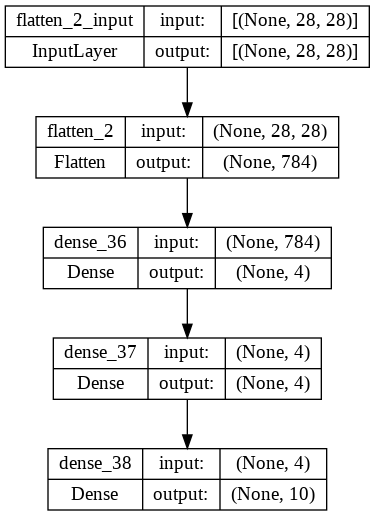

In [124]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes = True)